# Getting the Data

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
X = boston['data']
y = boston['target']

# Building a Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_lin = lin_reg.predict(X_test)
y_pred_lin

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ,
        5.12703513, 16.3867396 , 17.07776485,  5.59375659, 39.99636726,
       32.49654668, 22.45798809, 36.85192327, 30.86401089, 23.15140009,
       24.77495789, 24.67187756, 20.59543752, 30.35369168, 22.41940736,
       10.23266565, 17.64816865, 18.27419652, 35.53362541, 20.96084724,
       18.30413012, 17.79262072, 19.96561663, 24.06127231, 29.10204874,
       19.27774123, 11.15536648, 24.57560579, 17.5862644 , 15.49454112,
       26.20577527, 20.86304693, 22.31460516, 15.60710156, 23.00363104,
       25.17247952, 20.11459464, 22.90256276, 10.0380507 , 24.28515123,
       20.94127711, 17.35258791, 24.52235405, 29.95143046, 13.42695877,
       21.72673066, 20.7897053 , 15.49668805, 13.98982601, 22.18377874,
       17.73047814, 21.58869165, 32.90522136, 31.11235671, 17.73252635,
       32.76358681, 18.7124637 , 19.78693475, 19.02958927, 22.89

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred_lin)

33.448979997676496

In [ ]:
mean_squared_error(y_train, lin_reg.predict(X_train))

19.326470203585725

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge(normalize=True)

ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([26.1651642 , 19.67326318, 26.92390682, 13.48330193, 22.66144095,
       21.49573092, 19.00774025, 22.66754981, 19.68072138, 20.45848218,
        9.15533931, 15.62397774, 17.3187897 ,  9.40916382, 33.1889647 ,
       31.51552638, 20.12247651, 34.12698781, 27.99335506, 23.28543688,
       24.68676174, 22.72764272, 20.97504961, 27.58243882, 23.35012921,
       10.18342881, 20.25108655, 19.96518986, 31.66144532, 21.48506197,
       17.36737121, 17.89901741, 23.09538558, 24.72169459, 26.27648252,
       19.08796673, 13.52319532, 20.94426005, 16.41350453, 15.66912853,
       25.5560216 , 22.67326902, 24.83886397, 15.23365758, 26.40211496,
       25.21499583, 22.172404  , 23.88642417, 15.21994802, 23.78870362,
       22.49306087, 19.98370115, 23.47379883, 31.21424444, 16.31839971,
       23.6762334 , 23.82848732, 21.59597569, 13.05399034, 23.11182213,
       24.38000223, 22.76646519, 29.96693583, 27.65349793, 17.16950016,
       29.66262364, 18.53533927, 23.07339611, 17.44065452, 23.15

In [ ]:
mean_squared_error(y_test, y_pred_ridge)

45.104198771450164

In [ ]:
mean_squared_error(y_train, ridge.predict(X_train))

27.31486857120688

Higher error than in Linear Regression for many values of lambda. This probably indicates that Ridge Regression is not a good fit because it is too incorrectly biased.

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly2 = PolynomialFeatures(degree = 2)

In [ ]:
X_train2 = poly2.fit_transform(X_train)
X_test2 = poly2.transform(X_test)

In [ ]:
poly_reg = LinearRegression().fit(X_train2, y_train)
y_pred_poly = poly_reg.predict(X_test2)

In [ ]:
mean_squared_error(y_test, y_pred_poly)

25.215797416856976

In [ ]:
mean_squared_error(y_train, poly_reg.predict(X_train2))

6.310156128322766

Lower error than Linear Regression when `degree = 2`. This means that this regression task is probably more complex than what Linear Regression can handle.

# Error Comparison

In [ ]:
print(
"""
Linear Regression MSE: 
\t\tTest: {:.2f}\tTrain: {:.2f}\n
Ridge Regression MSE:
\t\tTest: {:.2f}\tTrain: {:.2f}\n
Polynomial Regression MSE:
\t\tTest: {:.2f}\tTrain: {:.2f}
""".format(mean_squared_error(y_test, y_pred_lin),
           mean_squared_error(y_train, lin_reg.predict(X_train)),
           mean_squared_error(y_test, y_pred_ridge),
           mean_squared_error(y_train, ridge.predict(X_train)),
           mean_squared_error(y_test, y_pred_poly),
           mean_squared_error(y_train, poly_reg.predict(X_train2)))
)


Linear Regression MSE: 
		Test: 33.45	Train: 19.33

Ridge Regression MSE:
		Test: 45.10	Train: 27.31

Polynomial Regression MSE:
		Test: 25.22	Train: 6.31



# SGD Example

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sgd = make_pipeline(PolynomialFeatures(degree=2), 
                    StandardScaler(), 
                    SGDRegressor(random_state=42))
sgd.fit(X_train, y_train)
mean_squared_error(y_test, sgd.predict(X_test))

24.734051437720947

In [ ]:
mean_squared_error(y_train, sgd.predict(X_train))

9.951531778644194

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
X = cancer['data']
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)

(569, 30)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_clf = make_pipeline(StandardScaler(), LogisticRegression())
log_clf.fit(X_train, y_train)

y_pred_log = log_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score,  f1_score

In [ ]:
confusion_matrix(y_test, y_pred_log) #actual on left, predicted on top

array([[41,  2],
       [ 1, 70]])

In [ ]:
precision_score(y_test, y_pred_log)

0.9722222222222222

In [ ]:
recall_score(y_test, y_pred_log)

0.9859154929577465

In [ ]:
roc_auc_score(y_test, y_pred_log)

0.969701932525385

In [ ]:
f1_score(y_test, y_pred_log)

0.979020979020979

# Decision Boundary

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(0)
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_repeated=0)

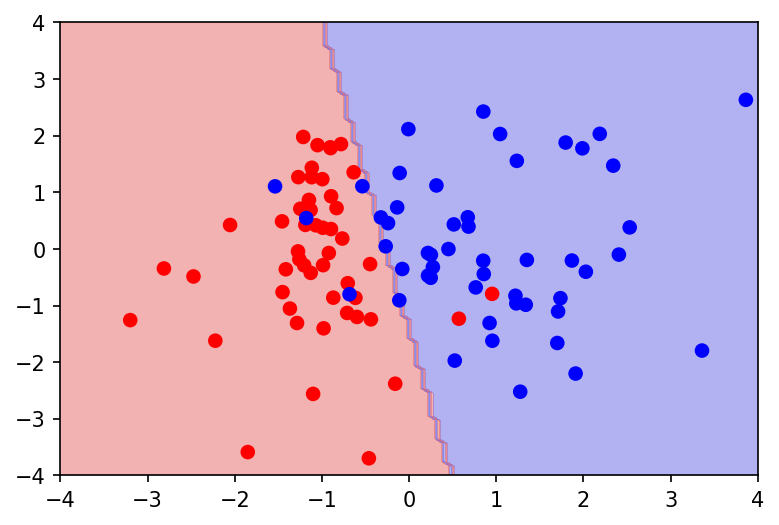

In [ ]:
log_clf = LogisticRegression()
log_clf.fit(X, y)

x0 = np.linspace(-4, 4, 100)
x1 = np.linspace(-4, 4, 100)

mesh0, mesh1 = np.meshgrid(x0, x1)
mesh_X = np.hstack([mesh0.reshape(-1, 1), mesh1.reshape(-1, 1)])
decision_pred = log_clf.predict(mesh_X).reshape(100, 100)

fig, ax = plt.subplots(dpi = 150)
plt.contourf(x0, x1, decision_pred, colors=[[.9, .4, .4, .5], [.9, .4, .4, .5], [.4, .4, .9, .5], [.4, .4, .9, .5]])
plt.scatter(X[:, 0], X[:, 1], c = np.where(y, "blue", "red"))
plt.show()

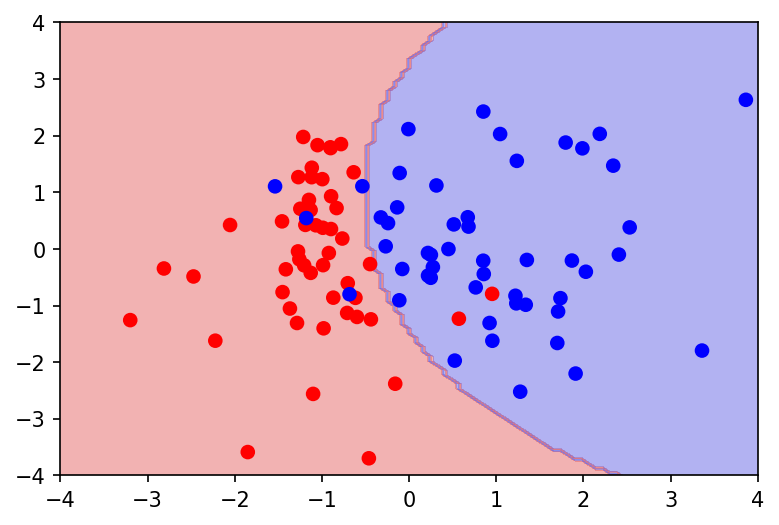

In [ ]:
log_clf = make_pipeline(PolynomialFeatures(2), LogisticRegression())
log_clf.fit(X, y)

x0 = np.linspace(-4, 4, 100)
x1 = np.linspace(-4, 4, 100)

mesh0, mesh1 = np.meshgrid(x0, x1)
mesh_X = np.hstack([mesh0.reshape(-1, 1), mesh1.reshape(-1, 1)])
decision_pred = log_clf.predict(mesh_X).reshape(100, 100)

fig, ax = plt.subplots(dpi = 150)
plt.contourf(x0, x1, decision_pred, colors=[[.9, .4, .4, .5], [.9, .4, .4, .5], [.4, .4, .9, .5], [.4, .4, .9, .5]])
plt.scatter(X[:, 0], X[:, 1], c = np.where(y, "blue", "red"))
plt.show()

# Extras

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd

In [ ]:
def make_data(num_features, num_samples=100): #Artificial data generation
    num_features = max(4, num_features)
    labels = [f"X{i}" for i in range(1, num_features + 1)] + ["y"]
    X, y, coef = make_regression(n_samples=num_samples, n_features=num_features, n_informative=num_features, noise=1, coef=True, random_state=42)
    data = pd.DataFrame(np.concatenate([X, y.reshape((-1,1))], axis=1), columns=labels)

    data['X1'] = pd.cut(data['X1'], 4, labels=["Blue", "Black", "Green", "Red"])
    data['X2'] = pd.cut(data['X2'], 2, labels=["Small", "Large"])
    data['X3'] = (data['X3'] + np.abs(np.min(data['X3']))) 
    data['X4'] = np.log(data['X4'] + np.abs(np.min(data['X4'])) + 40) * 50
    return data

In [ ]:
df = make_data(7)
df.head()

,X1,X2,X3,X4,X5,X6,X7,y
0,Green,Large,4.764297,187.165432,-0.138264,-0.234153,0.647689,190.223085
1,Green,Small,3.288666,186.987051,-1.211016,-0.860413,-0.651836,-59.750756
2,Green,Large,2.763610,187.833104,-0.856084,0.478980,0.071566,123.266804
3,Black,Small,3.455361,187.645297,-0.446515,-1.245739,0.856399,-155.960057
4,Black,Small,3.440327,187.523941,-0.981509,-0.600217,0.462103,-71.080200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X1      100 non-null    category
 1   X2      100 non-null    category
 2   X3      100 non-null    float64 
 3   X4      100 non-null    float64 
 4   X5      100 non-null    float64 
 5   X6      100 non-null    float64 
 6   X7      100 non-null    float64 
 7   y       100 non-null    float64 
dtypes: category(2), float64(6)
memory usage: 5.3 KB


- 2 categorical variables
- 5 numerical variables

**The response variable (y) is quantitative, therefore this is a regression task**

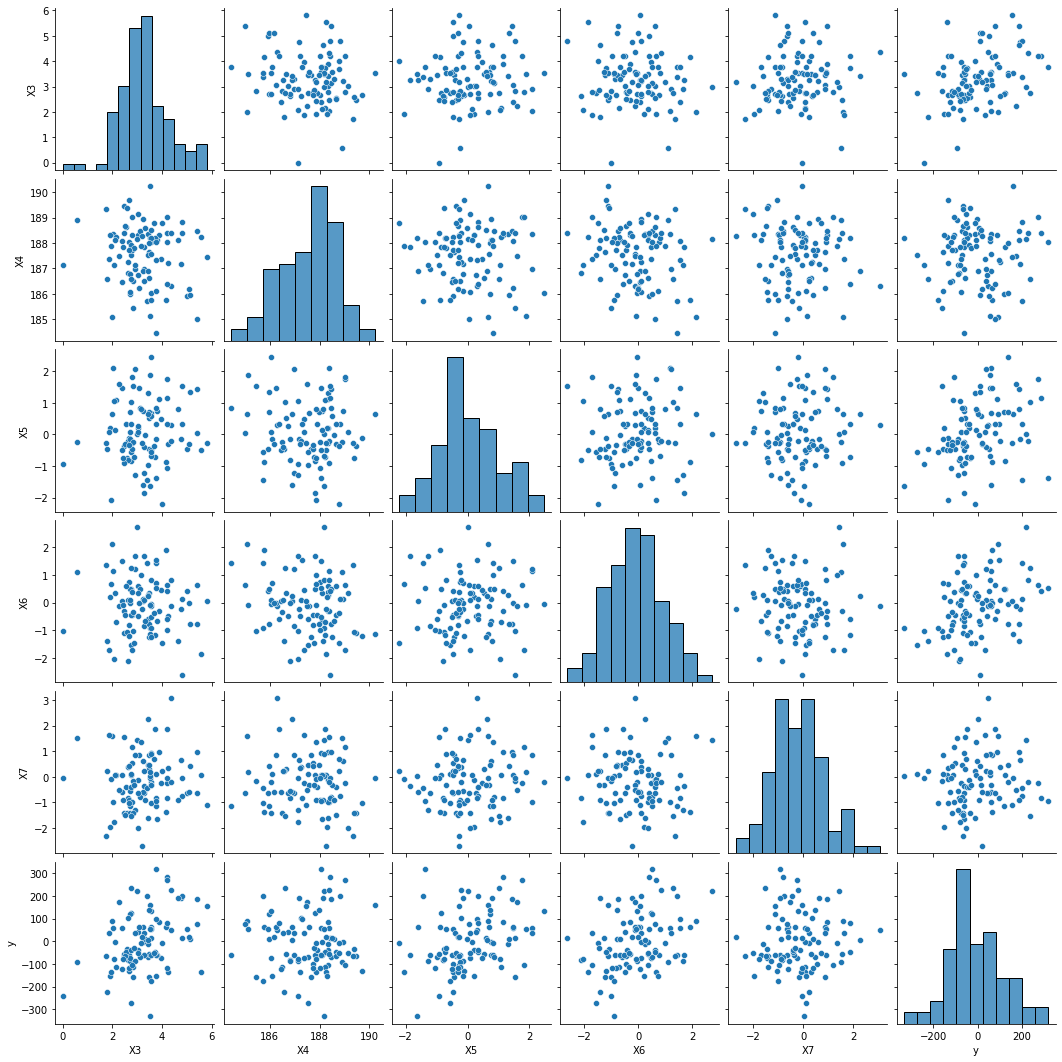

In [ ]:
sns.pairplot(df)

Seeing if there are any relationships between the response and the independent variables


Before actually using any model, we have to clean the data. Linear Regression doesn't know what "Green" is. Certain regression models also work best when the features have a similar mean and scale (i.e. we have to normalize features).

In [ ]:
X = df.drop("y", axis = 1)
y = df["y"]
print(X.head())
print()
print(y.head())

      X1     X2        X3          X4        X5        X6        X7
0  Green  Large  4.764297  187.165432 -0.138264 -0.234153  0.647689
1  Green  Small  3.288666  186.987051 -1.211016 -0.860413 -0.651836
2  Green  Large  2.763610  187.833104 -0.856084  0.478980  0.071566
3  Black  Small  3.455361  187.645297 -0.446515 -1.245739  0.856399
4  Black  Small  3.440327  187.523941 -0.981509 -0.600217  0.462103

0    190.223085
1    -59.750756
2    123.266804
3   -155.960057
4    -71.080200
Name: y, dtype: float64


## One Hot Encoding

This is the process that converts categorical information, i.e. "Green", "Small", into numerical information. `OneHotEncoder` creates a new column for each class and assigns 1 if that particular instance has that class.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(sparse=False)
enc.fit_transform([["Blue"], # 4x1 matrix originally with 3 classes
                   ["Green"],
                   ["Red"],
                   ["Green"]])
# output is 4x3 matrix, each column represents 1 class

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [ ]:
enc = OneHotEncoder(sparse=False)
enc.fit_transform(X[["X1", "X2"]]) #concatenates all of the columns

array([[0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1., 0.],
       [0.

## Scaling Numeric Variables

Scaling is when the features are shifted and scaled. Usually this means the mean of the feature is subtracted from it, and the resulting value is divided by the standard deviation. Some statistical methods require scaling in order to function properly. KNN, Ridge/LASSO/ElasticNet, any Gradient Descent algorithm, etc. need scaling.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
num_X = X.drop(['X1', 'X2'], axis = 1) #have to only take the numeric columns
X_scaled = scaler.fit_transform(num_X)

print(f"Mean and Standard Deviation before scaling\n{num_X.mean()} \n\n{num_X.std()}")

print(f"\nMean and Standard Deviation after scaling\n{np.round(X_scaled.mean(axis=0))} \n\n{X_scaled.std(axis=0)}")

Mean and Standard Deviation before scaling
X3      3.257893
X4    187.560858
X5      0.085669
X6     -0.094360
X7     -0.183141
dtype: float64 

X3    0.994083
X4    1.142518
X5    0.968038
X6    1.012554
X7    1.038662
dtype: float64

Mean and Standard Deviation after scaling
[0. 0. 0. 0. 0.] 

[1. 1. 1. 1. 1.]


## Transformers

Scikit-learn has a construct called a transformer, which can (loosely defined) take an input and can transform them in some way. `OneHotEncoder()`, `StandardScaler()`, `PolynomialFeatures()` are transformers. Transforms *always* have a `fit_transform()` method.

`ColumnTransformer()` is a transformer than can apply other transformers to specific columns, then it combines them. This is exactly what we need to combine the output from numeric preprocessing and categorical preprocessing. Doing it this way has some advantages that we'll see later compared to just concatenating the columns using something like `np.concatenate()`. Namely, it can be used in a `Pipeline`.

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
scaler = StandardScaler()
enc = OneHotEncoder()
ct = ColumnTransformer(
    [
        ("cat", enc, ["X1", "X2"]), 
        ("num", scaler, ["X3", "X4", "X5", "X6", "X7"]) #could also use sklearn.compose.make_column_selector() to select columns
    ]
)

print("Before:", X.values[0])
print("After:", ct.fit_transform(X)[0])

Before: ['Green' 'Large' 4.764297196477098 187.16543153149948 -0.13826430117118466
 -0.23415337472333597 0.6476885381006925]
After: [ 0.          0.          1.          0.          1.          0.
  1.52300483 -0.34784429 -0.23249293 -0.13875516  0.80393419]


## Pipelines

`Scikit-learn`'s API has a construct known as a `Pipeline`. A `Pipeline` works with any scikit-learn object that has a `fit_transform()` method. Objects that are referred to as *transformers* have `fit_transform()` methods. Basically, any object that takes in input and can return an output is a transfomer.

All steps in the Pipeline must be a transformer, except for the last step, which is allowed to be a estimator (which only has a `fit()` method and not a `transform()` method).

## Learning Curves

Learning Curves plot the number of instances used for training on the x-axis and the error on the y-axis. They provide us more information about bias and variance and whether or not getting more training data would help the model.

In [ ]:
X = boston['data']
y = boston['target']

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring="neg_mean_squared_error", #the original data, automatically splits into train/test
                                                            train_sizes=np.array(np.linspace(0.2, 1, 15)), cv=50, n_jobs=-1)


    plt.plot(train_sizes, -train_scores.mean(axis=1), 'o-', color="r")
    plt.plot(train_sizes, -test_scores.mean(axis=1), 'o-', color="g")
    plt.ylim((0, 1000))
    plt.show()

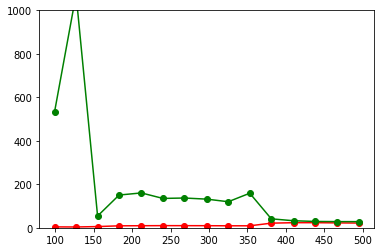

In [ ]:
plot_learning_curve(make_pipeline(StandardScaler(), SGDRegressor()), X, y)

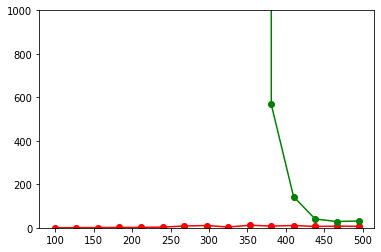

In [ ]:
plot_learning_curve(make_pipeline(PolynomialFeatures(2), LinearRegression()),
                    X, y)

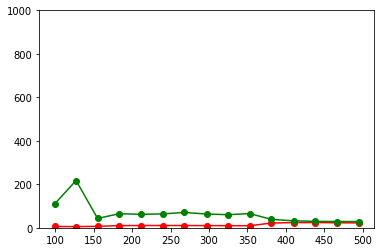

In [ ]:
plot_learning_curve(make_pipeline(Ridge(alpha=10)), 
                   X, y)